<div class="alert alert-block alert-info">

# Exercises

<div class="alert alert-block alert-info">

## Exercises: Hypothesis Correlation

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be).

### Then give an example of what a true positive, true negative, type I and type II errors would look like.

*Note that some of the questions are intentionally phrased in a vague way. 
It is your job to reword these as more precise questions that could be tested.*

### 1. Has the network latency gone up since we switched internet service providers?

### Null hypothesis (H₀):

    There is no significant difference or decrease in latency between spectrum and google fiber in online games.

### Alternative hypothesis (Hₐ):

    There is a significant difference in latency between spectrum and google fiber in online games. 

### True positive: 

    Rejecting the null hypothesis when there is actually a significant difference in latency between spectrum and google fiber in online games.

### True negative: 

    Accepting the null hypothesis when there is no significant difference in latency between spectrum and google fiber in online games.

### Type I error (False Positive): 

    Rejecting the null hypothesis when there is actually no significant difference in latency between spectrum and google fiber in online games.

    Example: Concluding that there is a significant difference in latency between spectrum and google fiber, but in reality, there is no difference.

### Type II error (False Negative):

    Accepting the null hypothesis when there is actually a significant difference in latency between spectrum and google fiber in online games.

    Example: Concluding that there is no significant difference in latency between spectrum and google fiber, but in reality, there is a difference.

### 2. Is the website redesign any good?

### Null Hypothesis:

    The clickthrough rate is not affected or increase by hiring a better web designer.

### Alternative Hypothesis:

    The clickthrough rate has decreased after hiring a better web designer.

### True Positive:

    The data analysis reveals a significant decrease in the clickthrough rate after hiring a better web designer, which aligns with the alternative hypothesis.

### True Negative:

    The data analysis does not show any change in the clickthrough rate after hiring a better web designer, which aligns with the null hypothesis.

### Type I Error (False Positive):

    The data analysis indicates a significant decrease in the clickthrough rate after hiring a better web designer, leading to the rejection of the null hypothesis. 

    However, in reality, there is no actual change in the clickthrough rate, and the decrease is coincidental or due to other factors.

### Type II Error (False Negative):

    The data analysis does not show any change in the clickthrough rate after hiring a better web designer, failing to reject the null hypothesis. 

    However, in reality, there is a decrease in the clickthrough rate, which is genuinely caused by hiring a better web designer.

### 3. Is our television ad driving more sales?

### Null hypothesis: 

    Hiring a better director for the television ad has no effect or a decrease on the number of people using the discount code from the commercial.

### Alternative hypothesis:

    Hiring a better director for the television ad increases the number of people using the discount code from the commercial.

### True positive:

    The number of people using the discount code has significantly increased after hiring the better director for the television ad, supporting the alternative hypothesis.

### True negative:

    The number of people using the discount code remains unchanged or does not significantly increase after hiring the better director, supporting the null hypothesis.

### Type I error (False Positive):

    The number of people using the discount code appears to have significantly increased after hiring the better director, but it is just due to random chance. In reality, the null hypothesis is true.

### Type II error (False Negative):

    The number of people using the discount code does not appear to have significantly increased after hiring the better director, but in reality, it has. This means we fail to reject the null hypothesis, even though the alternative hypothesis is true.

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be).

### Then give an example of what a true positive, true negative, type I and type II errors would look like.

*Note that some of the questions are intentionally phrased in a vague way. 
It is your job to reword these as more precise questions that could be tested.*

<div class="alert alert-block alert-info">

## Exercises: Correlations

### Answer with the type of stats test you would use (assume normal distribution):

Is there a relationship between the length of your arm and the length of your foot?

- Since these are both continuous variables, I would use the Pearson correlation coefficient

Does smoking affect when or not someone has lung cancer?

- I would use a chi-square test for independence, comparing observed frequencies in smokers and non-smokers to expected frequencies under independence.

Is gender independent of a person’s blood type?

- I would use a chi-square test for independence, comparing observed frequencies of blood types and the expecting frequencies assuming independence.

Does whether or not a person has a cat or dog affect whether they live in an apartment?

- I would again use a chi-square test for indendence, comparing observed frequencies of apartment living among cat owners, dog owners, and those with neither to the expected frequencies under independence. 

Does the length of time of the lecture correlate with a student's grade?

- Since these are both continuous variables, I would use the Pearson correlation coefficient and assess the strength and direction of the linear relationship.

In [26]:
# Use the telco_churn data.

from env import db_url
import pandas as pd
import numpy as np
import seaborn as sns

url = db_url('telco_churn')

query = '''SELECT *
        FROM customers'''

telco = pd.read_sql(query, url)

In [27]:
# Does tenure correlate with monthly charges?

tenure_monthly = telco[['tenure', 'monthly_charges']]

tenure_monthly.corr()

# No, tenure has a correlation of 0.2479 which is low.

,tenure,monthly_charges
tenure,1.0000,0.2479
monthly_charges,0.2479,1.0000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [29]:
# Couldn't run the .corr() due to string values. I then ran pd.to_numeric to convert everything to numeric.
# Anything it couldn't convert to numeric, it turned to Null. I then used .info() to compare to the original
# telco to the tc_converted. It only had 9 nulls, so I dropped them.

tc_converted = pd.to_numeric(telco['total_charges'], errors='coerce')

tc_converted.info()

len(telco)

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: total_charges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [32]:
# Clean the total charges column.

telco['total_charges'] = pd.to_numeric(telco['total_charges'], errors='coerce')

telco['total_charges'] = telco['total_charges'].dropna()

In [33]:
# Total charges?

tenure_total = telco[['tenure', 'total_charges']]

tenure_total.corr()

# Yes, tenure and total charges have a strong correlation of 0.82.

,tenure,total_charges
tenure,1.00000,0.82588
total_charges,0.82588,1.00000


In [ ]:
# What happens if you control for phone and internet service?



In [ ]:
# Use the employees database.

# Is there a relationship between how long an employee has been with the company and their salary?



In [ ]:
# Is there a relationship between how long an employee has been with the company and the number of titles they have had?



In [ ]:
# Use the sleepstudy data.

# Is there a relationship between days and reaction time?



<div class="alert alert-block alert-info">

# Notes: Hypothesis Testing

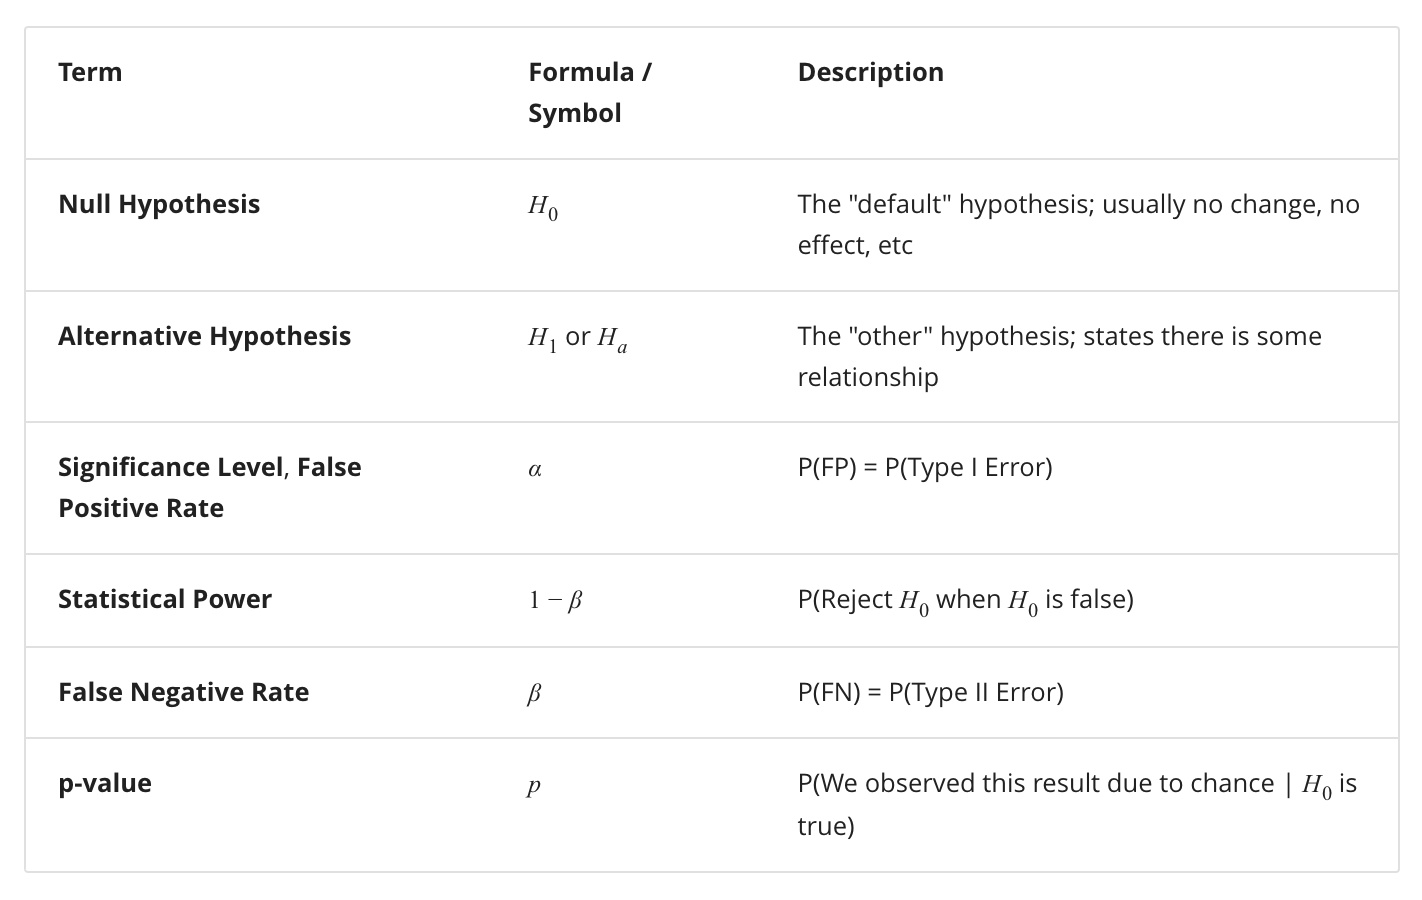

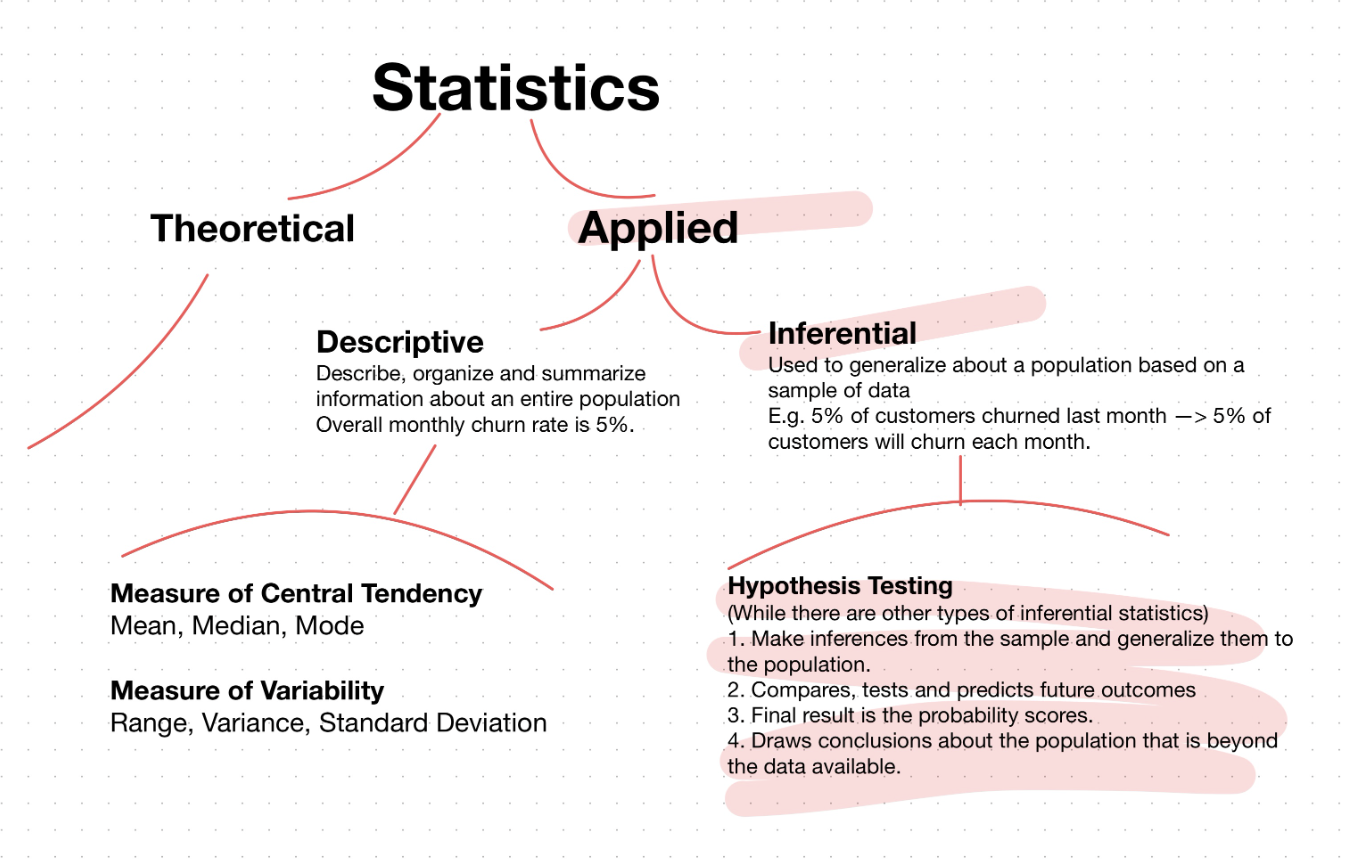

<div class="alert alert-block alert-info">

# Notes: Correlation Coefficient

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)

df.head(3)

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6


In [14]:
stats.pearsonr(df['exam_score'], df['hours_studied'])

PearsonRResult(statistic=0.8351498542413308, pvalue=2.0762953315462545e-11)

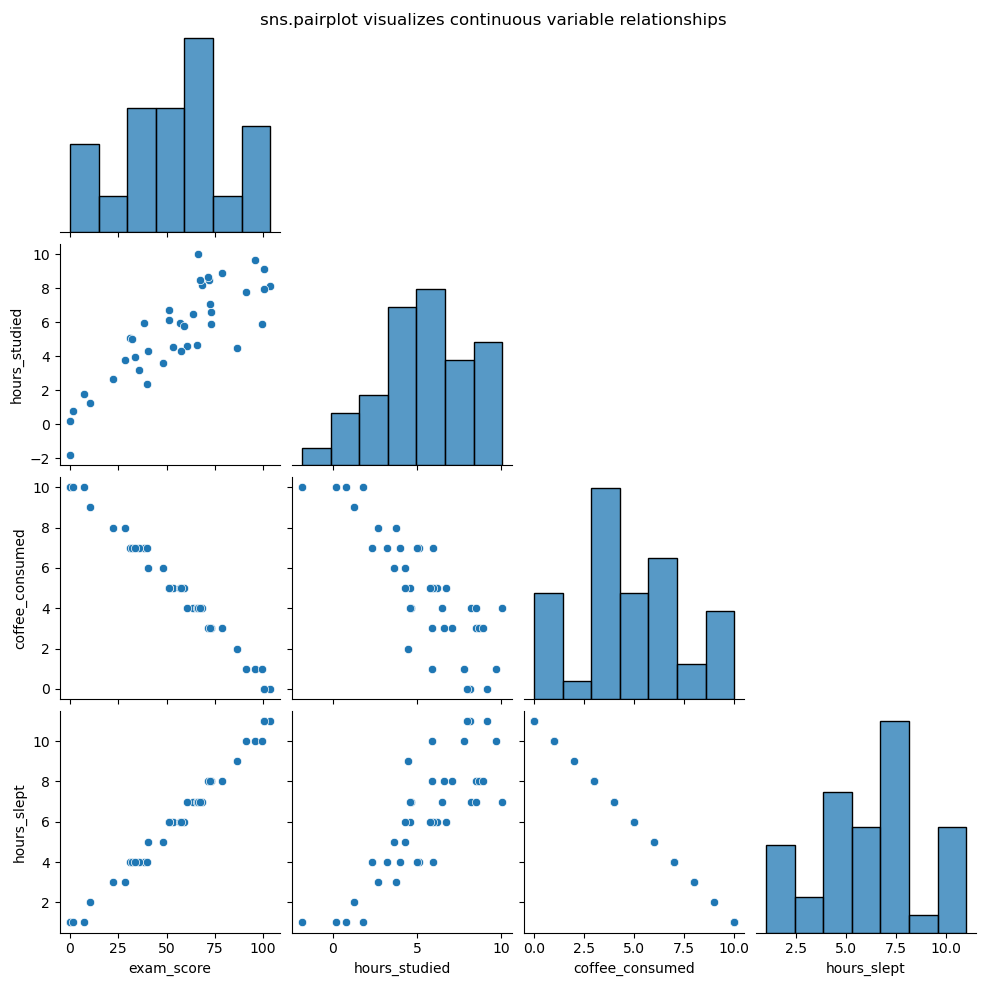

In [15]:
sns.pairplot(df, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()

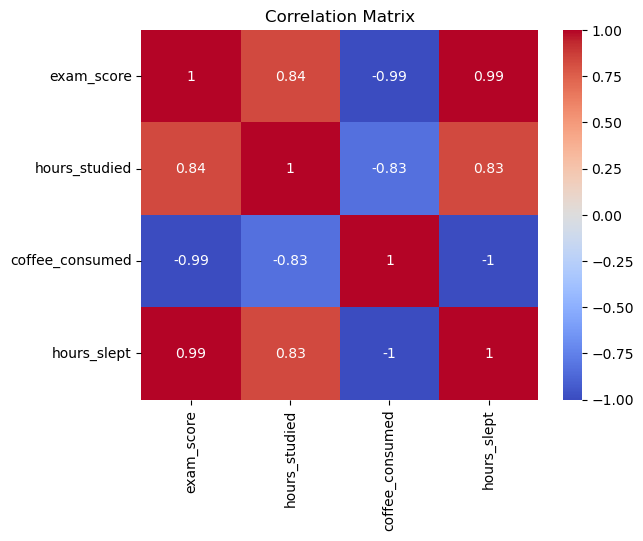

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)

# exclude columns with string values
df_no_strings = df.select_dtypes(exclude=['object'])

sns.heatmap(df_no_strings.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()